In [97]:
# Import necessary libraries

# Data manipulation and numerical computations
import pandas as pd  
import numpy as np  

# Data visualization
import matplotlib.pyplot as plt  
import seaborn as sns  

# Fetching stock market data
import yfinance as yf  

# Scikit-learn modules for data preprocessing and modeling
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  

# TensorFlow for deep learning
import tensorflow as tf  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, LSTM, Dropout  

In [99]:
# Load dataset
file_path = 'Stocks.csv'  # File path

# Read the CSV file with error handling
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Loaded Successfully!")
print(df.info())  # Show column names, data types, and non-null values
print("\nFirst 5 rows of the dataset:")
print(df.head())  # Preview first few rows


Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 525 entries, ('Date', 'IBM', 'AAPL', 'MSFT', 'XRX', 'AMZN', 'DELL', 'GOOGL', 'ADBE', '^GSPC') to ('2022-06-28', '141.86000061035156', '137.44000244140625', '256.4800109863281', '15.819999694824219', '107.4000015258789', '48.939998626708984', '2240.14990234375', '365.6300048828125', '3821.550048828125')
Data columns (total 1 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   # Data source: https://finance.yahoo.com  392 non-null    object
dtypes: object(1)
memory usage: 123.9+ KB
None

First 5 rows of the dataset:
                                                                                                                                               # Data source: https://finance.yahoo.com
Date       IBM                AAPL                MSFT                XRX                AMZN DELL GOOGL ADBE     

In [101]:
stock_ticker = 'AAPL'
# Fetch the last 3 months of daily stock data
try:
    df = yf.download(stock_ticker, period='3mo', interval='1d')
    print("Stock data downloaded successfully!")

    # Display basic dataset information
    print("\nDataset Info:")
    print(df.info())

    # Show the first few rows of the data
    print("\nFirst 5 Rows of the Stock Data:")
    print(df.head())

except Exception as e:
    print(f"Error downloading stock data: {e}")


[*********************100%***********************]  1 of 1 completed

Stock data downloaded successfully!

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2024-12-16 to 2025-03-14
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   60 non-null     float64
 1   (High, AAPL)    60 non-null     float64
 2   (Low, AAPL)     60 non-null     float64
 3   (Open, AAPL)    60 non-null     float64
 4   (Volume, AAPL)  60 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.8 KB
None

First 5 Rows of the Stock Data:
Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2024-12-16  250.764282  251.103920  247.378006  247.717644   51694800
2024-12-17  253.201599  253.551221  249.505666  249.805339   51356400
2024-12-18  247.777573  254.000726  247.467916  251.883059   56774100
2024

In [119]:
# Check for missing values
print("\nMissing Values in Each Column:\n", df.isnull().sum())

# If missing values exist, handle them
if df.isnull().sum().sum() > 0:
    print("\n⚠️ Warning: Missing values detected! Handling missing data...")
    
    # Option 1: Fill missing values with the previous day's data (forward fill)
    df.fillna(method='ffill', inplace=True)
    
    # Option 2: Drop rows with missing values (optional)
    # df.dropna(inplace=True)

    print("\n✅ Missing values handled!")
    print("\nUpdated Missing Values Count:\n", df.isnull().sum())
else:
    print("\n✅ No missing values found!")



Missing Values in Each Column:
 Price  Ticker
Close  AAPL      0
High   AAPL      0
Low    AAPL      0
Open   AAPL      0
MA50             0
Day              0
Month            0
Year             0
dtype: int64

✅ No missing values found!


In [121]:
# Define the columns to drop
columns_to_drop = ['Adj Close', 'Volume']  # Add other unnecessary columns here

# Check which columns exist before dropping
existing_columns = [col for col in columns_to_drop if col in df.columns]

if existing_columns:
    df.drop(columns=existing_columns, inplace=True)
    print(f"Dropped columns: {existing_columns}")
else:
    print("No specified columns found in the DataFrame.")

# Display remaining columns
print("Updated Columns in the DataFrame:", df.columns)


No specified columns found in the DataFrame.
Updated Columns in the DataFrame: MultiIndex([('Close', 'AAPL'),
            ( 'High', 'AAPL'),
            (  'Low', 'AAPL'),
            ( 'Open', 'AAPL'),
            ( 'MA50',     ''),
            (  'Day',     ''),
            ('Month',     ''),
            ( 'Year',     '')],
           names=['Price', 'Ticker'])


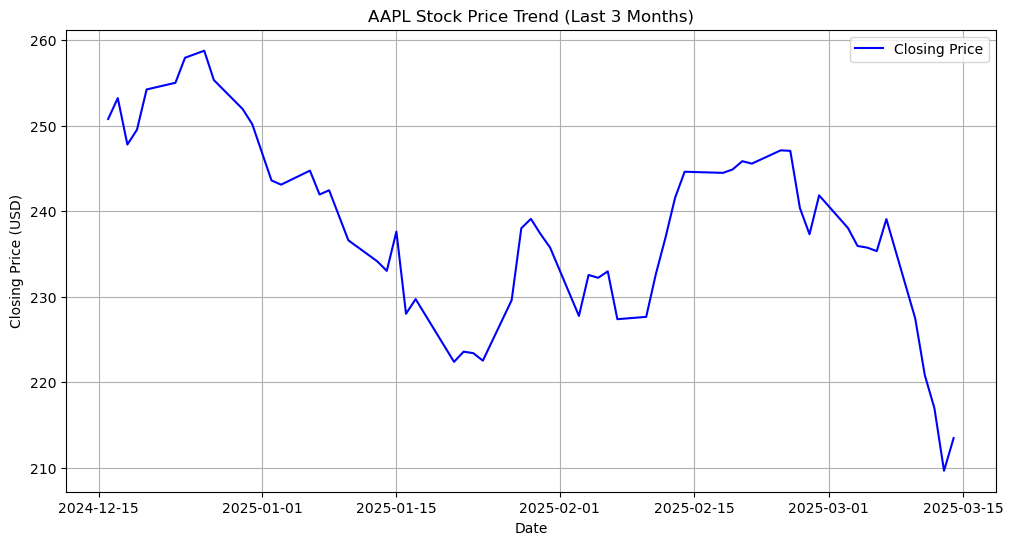

In [123]:
#Exploratory Data Analysis (EDA)
# Ensure the index is in datetime format
df.index = pd.to_datetime(df.index)

# Plot Stock Price Trend
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], color='blue', label="Closing Price")  # Use index for Date
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title(f"{stock_ticker} Stock Price Trend (Last 3 Months)")
plt.legend()
plt.grid(True)
plt.show()

#Shows how the stock price has changed over time in the last 3 months.
#✅ Identifies trends:

#Upward trend 📈 → Stock is growing.
#Downward trend 📉 → Stock is declining.
#Volatility 🔄 → Frequent up-and-down fluctuations.
#✅ Useful for decision-making:
#Investors can identify buying/selling opportunities.


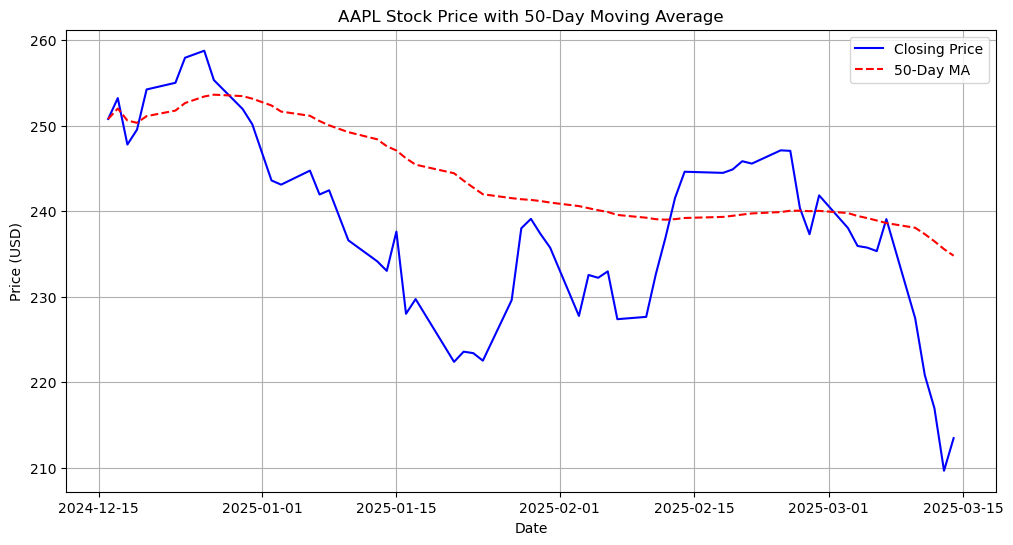

In [109]:
# Calculate Moving Averages
df['MA50'] = df['Close'].rolling(window=50, min_periods=1).mean()  # Allows calculation for early rows

# Plot Stock Price with MA50
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], color='blue', label="Closing Price")
plt.plot(df.index, df['MA50'], color='red', linestyle='dashed', label="50-Day MA")  # Dashed for clarity
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title(f"{stock_ticker} Stock Price with 50-Day Moving Average")
plt.legend()
plt.grid(True)
plt.show()

#✅ Stock price fluctuations over time.
#✅ Moving Average smooths short-term noise → Helps detect trends.
#✅ Trading Insights:

#If the stock price is above MA50 → Bullish trend (possible buy signal). 📈
#If the stock price is below MA50 → Bearish trend (possible sell signal). 📉
# When stock price crosses above MA50 → Potential uptrend breakout.
# When stock price crosses below MA50 → Potential downtrend.


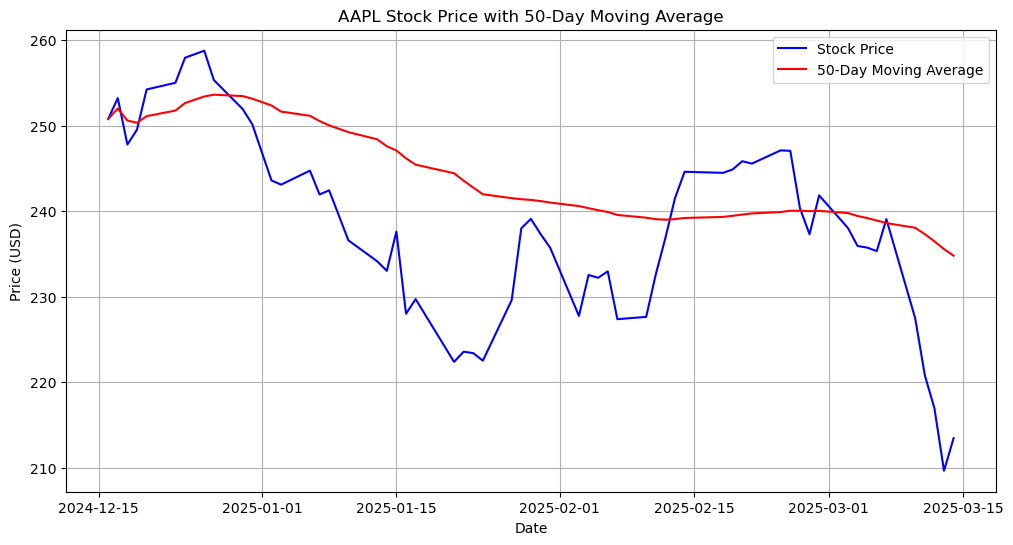

In [111]:
# Plot Moving Average with Stock Price
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label="Stock Price", color='blue')
plt.plot(df.index, df['MA50'], label="50-Day Moving Average", color='red')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title(f"{stock_ticker} Stock Price with 50-Day Moving Average")
plt.legend()
plt.grid(True)
plt.show()

# If the stock price is ABOVE the 50-day MA → Uptrend (Bullish Market) 📈
#✅ If the stock price is BELOW the 50-day MA → Downtrend (Bearish Market) 📉
#✅ When the stock price crosses ABOVE the 50-day MA → Potential Buying Signal
#✅ When the stock price crosses BELOW the 50-day MA → Potential Selling Signal



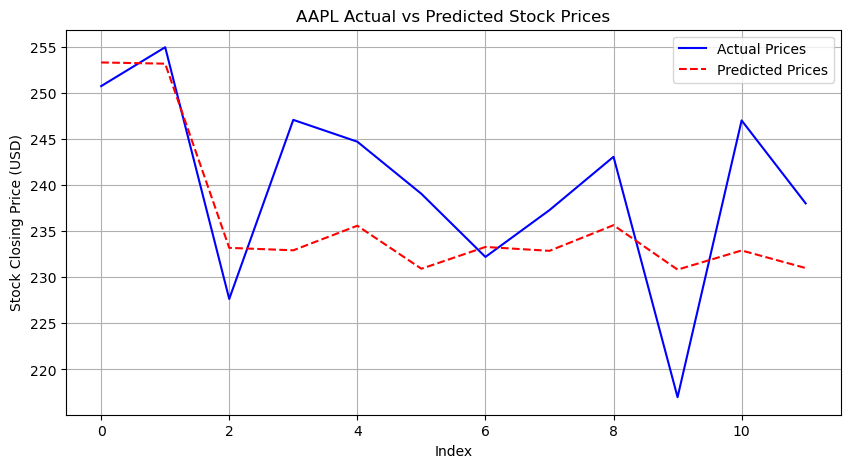

In [113]:
# Reset index for alignment
y_test_reset = y_test.reset_index(drop=True)

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.plot(y_test_reset, label="Actual Prices", color='blue')
plt.plot(y_pred, label="Predicted Prices", color='red', linestyle="dashed")
plt.xlabel("Index")
plt.ylabel("Stock Closing Price (USD)")
plt.title(f"{stock_ticker} Actual vs Predicted Stock Prices")
plt.legend()
plt.grid(True)
plt.show()









In [115]:
# Maching Leraning

# Extracting Date Features
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year

# Selecting features (X) and target variable (y)
X = df[['Day', 'Month', 'Year']]
y = df['Close']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📈 Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")












📈 Model Performance:
Mean Absolute Error (MAE): 7.44
Mean Squared Error (MSE): 75.62
Root Mean Squared Error (RMSE): 8.70
R² Score: 0.26
